In [69]:
# Muhammet İhsan Türksoy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
file_path = 'monk.csv'
data = pd.read_csv(file_path)

In [5]:
# Sütun isimlerindeki tırnakları temizleme
data.columns = data.columns.str.replace("'", "")

In [7]:
print(data.columns)

Index(['id', 'class', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6'], dtype='object')


In [9]:
target_column = "class" 

In [13]:
# Veri setinin genel bilgilerini kontrol etme
print("Toplam veri örneği:", len(data))
print("Veri seti sütunları:", data.columns)

Toplam veri örneği: 601
Veri seti sütunları: Index(['id', 'class', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6'], dtype='object')


In [15]:
print(data.head()) 

   id  class  attr1  attr2  attr3  attr4  attr5  attr6
0   1      0      1      1      1      1      2      2
1   2      0      1      1      1      1      4      1
2   3      0      1      1      1      2      1      1
3   4      0      1      1      1      2      1      2
4   5      0      1      1      1      2      2      1


In [17]:
print(data.describe())  

               id       class       attr1       attr2       attr3       attr4  \
count  601.000000  601.000000  601.000000  601.000000  601.000000  601.000000   
mean   301.000000    0.342762    1.996672    1.993344    1.502496    2.011647   
std    173.638033    0.475028    0.816490    0.810322    0.500410    0.819470   
min      1.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
25%    151.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
50%    301.000000    0.000000    2.000000    2.000000    2.000000    2.000000   
75%    451.000000    1.000000    3.000000    3.000000    2.000000    3.000000   
max    601.000000    1.000000    3.000000    3.000000    2.000000    3.000000   

            attr5       attr6  
count  601.000000  601.000000  
mean     2.492512    1.500832  
std      1.112217    0.500416  
min      1.000000    1.000000  
25%      1.000000    1.000000  
50%      3.000000    2.000000  
75%      3.000000    2.000000  
max      4.000

In [21]:
print(data.isnull().sum())

id       0
class    0
attr1    0
attr2    0
attr3    0
attr4    0
attr5    0
attr6    0
dtype: int64


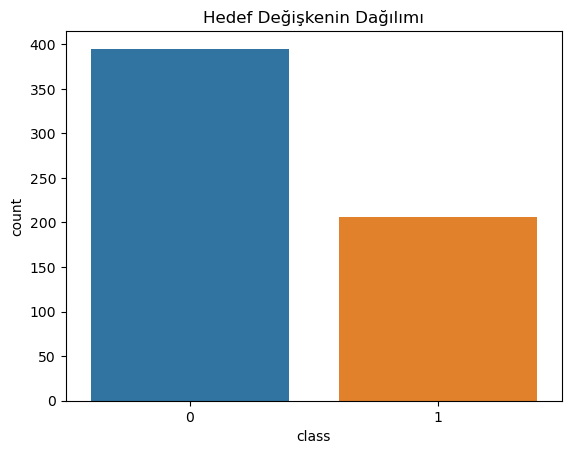

In [23]:
sns.countplot(x=target_column, data=data)
plt.title('Hedef Değişkenin Dağılımı')
plt.show()

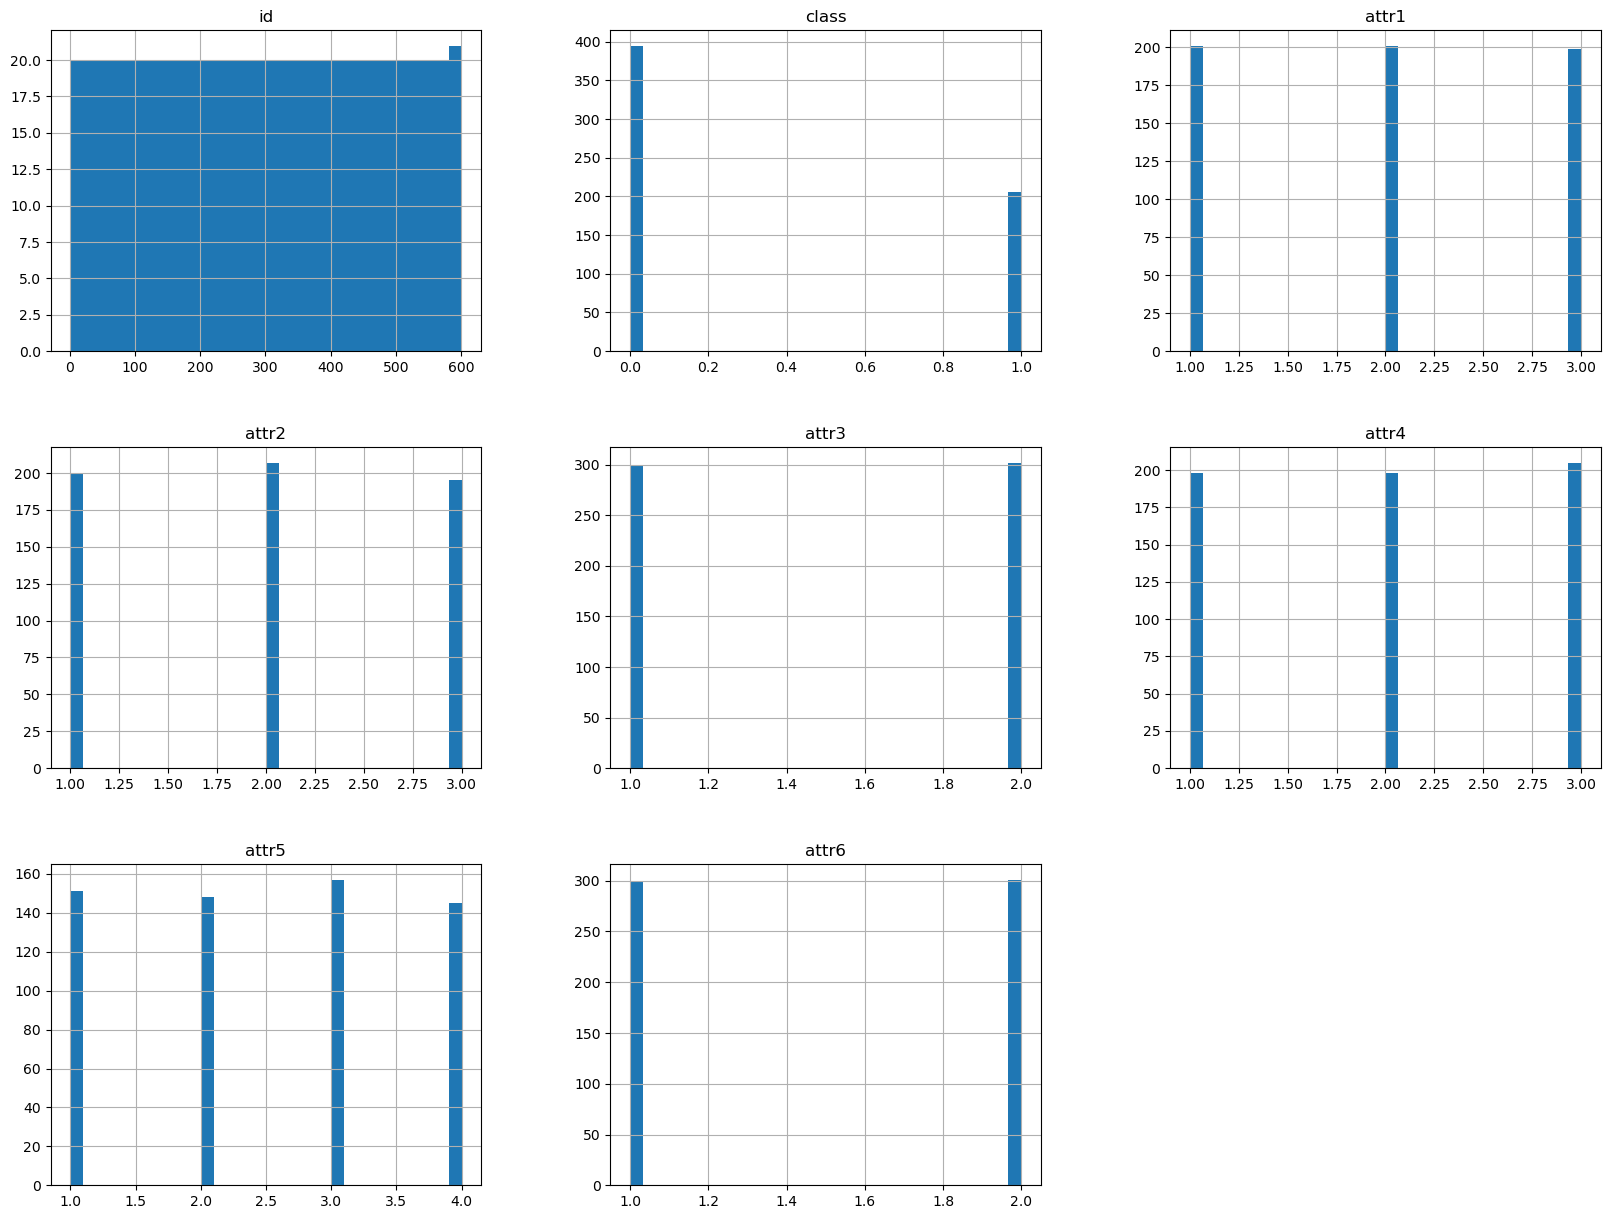

In [25]:
# Özelliklerin dağılımı
data.hist(bins=30, figsize=(20, 15))
plt.show()

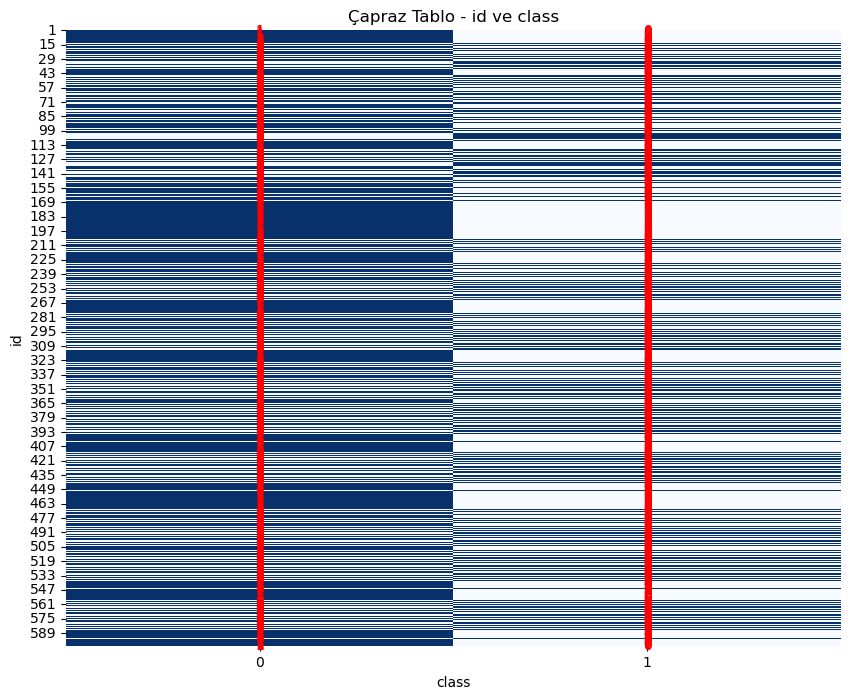

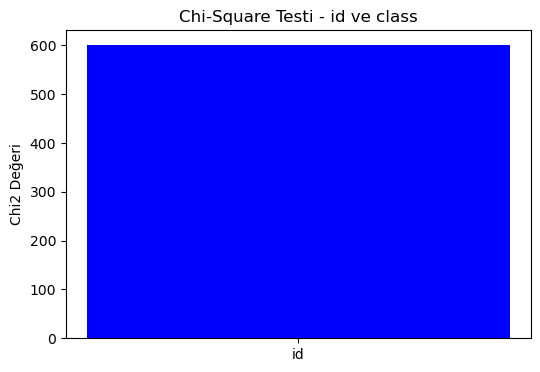

Chi-Square Testi - id ve class
Chi2 Değeri: 601.0, p-değeri: 0.4808201173271071



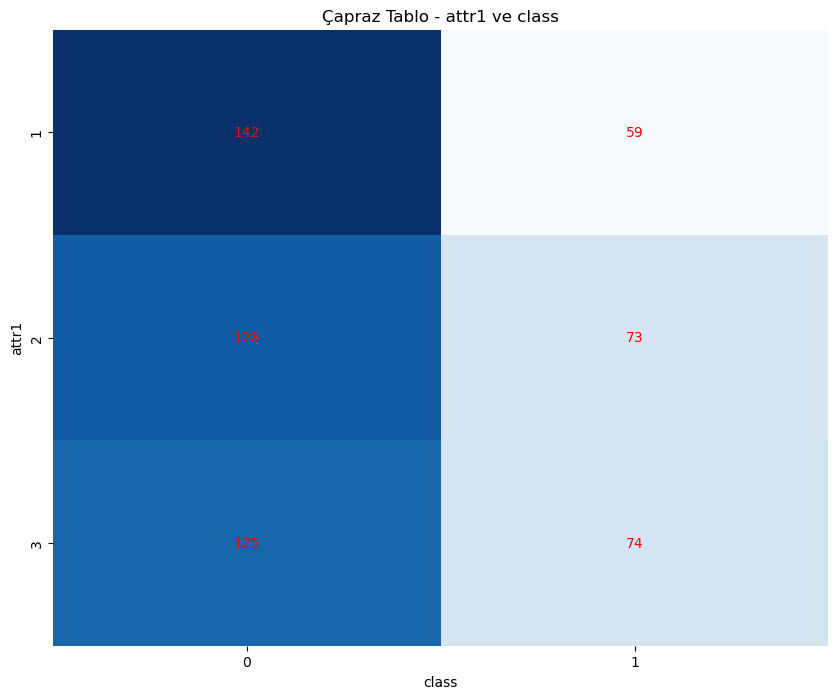

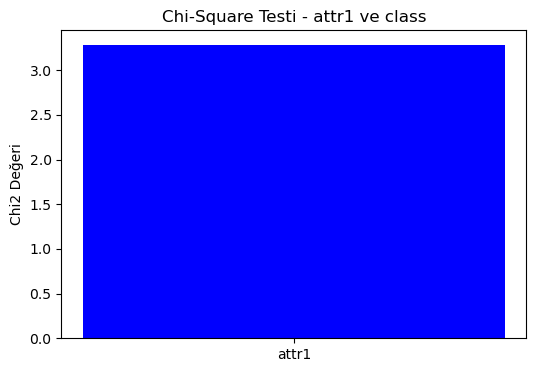

Chi-Square Testi - attr1 ve class
Chi2 Değeri: 3.282408809021995, p-değeri: 0.19374655248922326



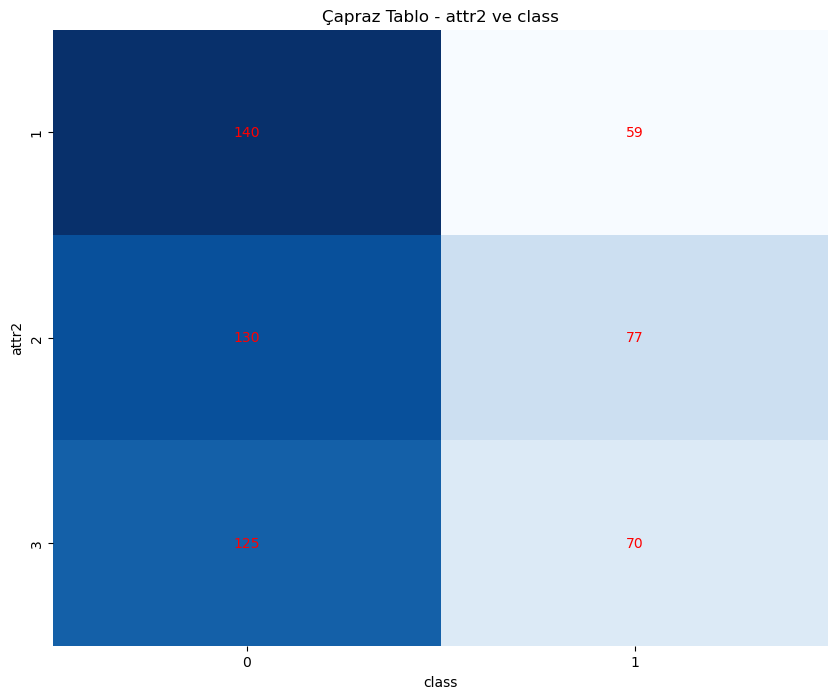

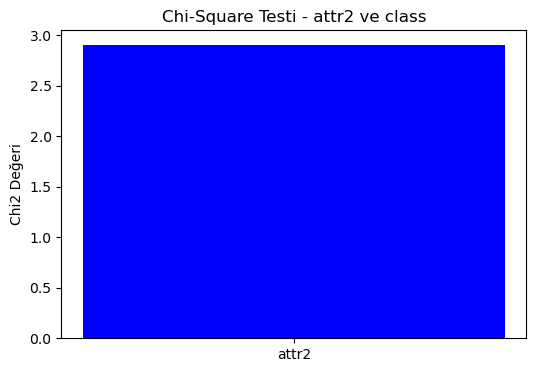

Chi-Square Testi - attr2 ve class
Chi2 Değeri: 2.9039658933356702, p-değeri: 0.23410560859224652



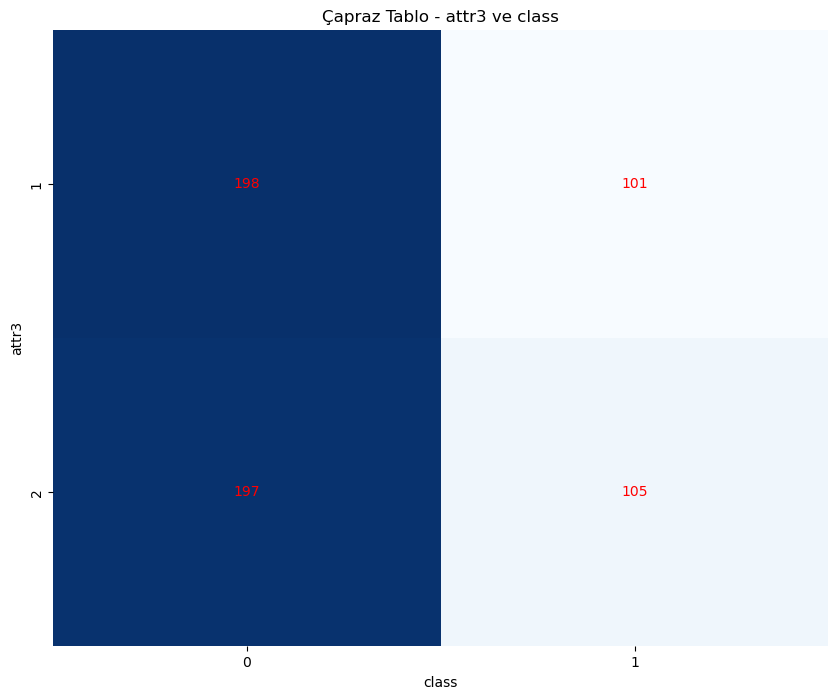

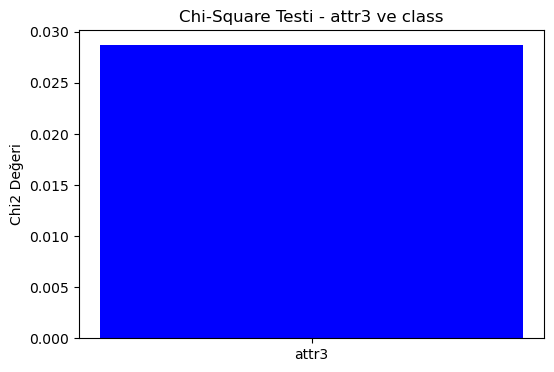

Chi-Square Testi - attr3 ve class
Chi2 Değeri: 0.028714994278921734, p-değeri: 0.8654387715834064



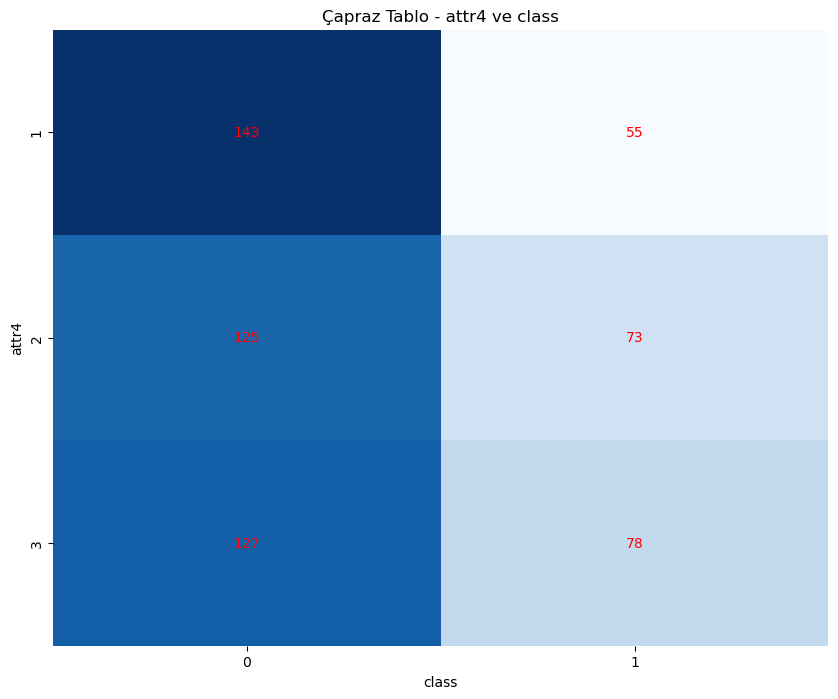

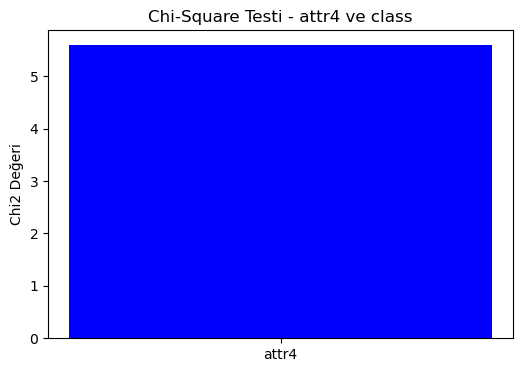

Chi-Square Testi - attr4 ve class
Chi2 Değeri: 5.5974966400562804, p-değeri: 0.0608862250182208



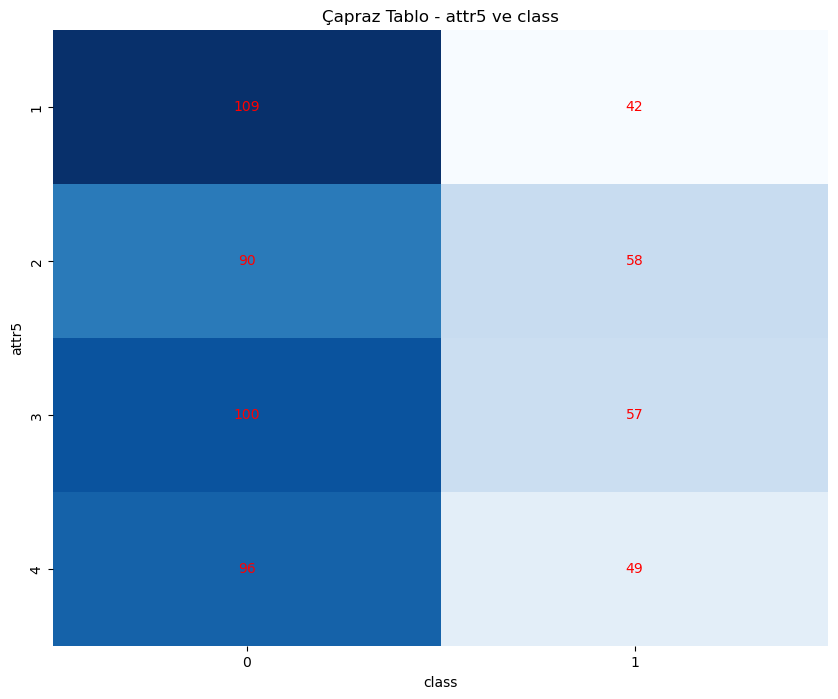

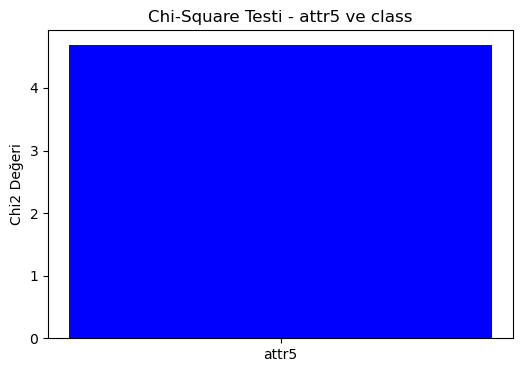

Chi-Square Testi - attr5 ve class
Chi2 Değeri: 4.686478062236721, p-değeri: 0.19624788144693056



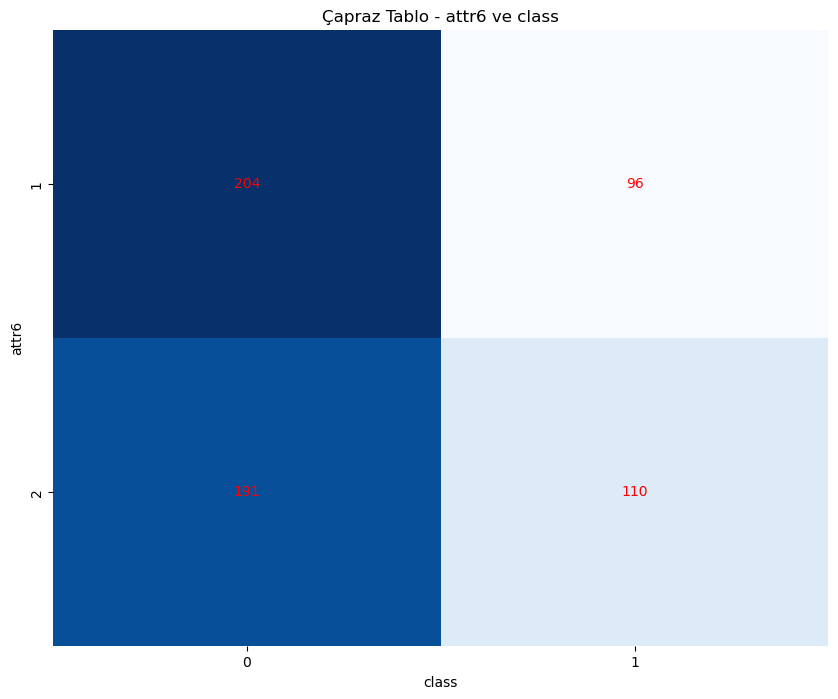

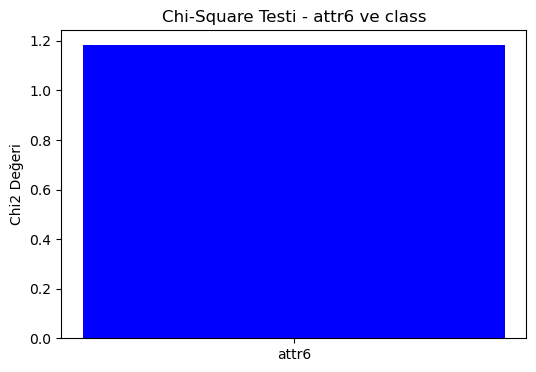

Chi-Square Testi - attr6 ve class
Chi2 Değeri: 1.1832846940019828, p-değeri: 0.2766883102458547



In [29]:
# Kategorik değişkenler için çapraz tablolar ve chi-square testi
for column in data.columns:
    if column != target_column:
        contingency_table = pd.crosstab(data[column], data[target_column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        plt.figure(figsize=(10, 8))
        for i in range(len(contingency_table)):
            for j in range(len(contingency_table.columns)):
                plt.text(j + 0.5, i + 0.5, contingency_table.iloc[i, j], ha='center', va='center', color='red', fontsize=10)
        sns.heatmap(contingency_table, annot=False, cmap='Blues', cbar=False)
        plt.title(f"Çapraz Tablo - {column} ve {target_column}")
        plt.xlabel(target_column)
        plt.ylabel(column)
        plt.show()

        plt.figure(figsize=(6, 4))
        plt.bar(column, chi2, color='blue')
        plt.title(f"Chi-Square Testi - {column} ve {target_column}")
        plt.ylabel('Chi2 Değeri')
        plt.show()

        print(f"Chi-Square Testi - {column} ve {target_column}")
        print(f"Chi2 Değeri: {chi2}, p-değeri: {p}\n")

In [31]:
X = data.drop(target_column, axis=1)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Toplam veri örneği:", len(data))
print("Eğitim seti boyutu:", len(X_train))
print("Test seti boyutu:", len(X_test))

Toplam veri örneği: 601
Eğitim seti boyutu: 480
Test seti boyutu: 121


In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

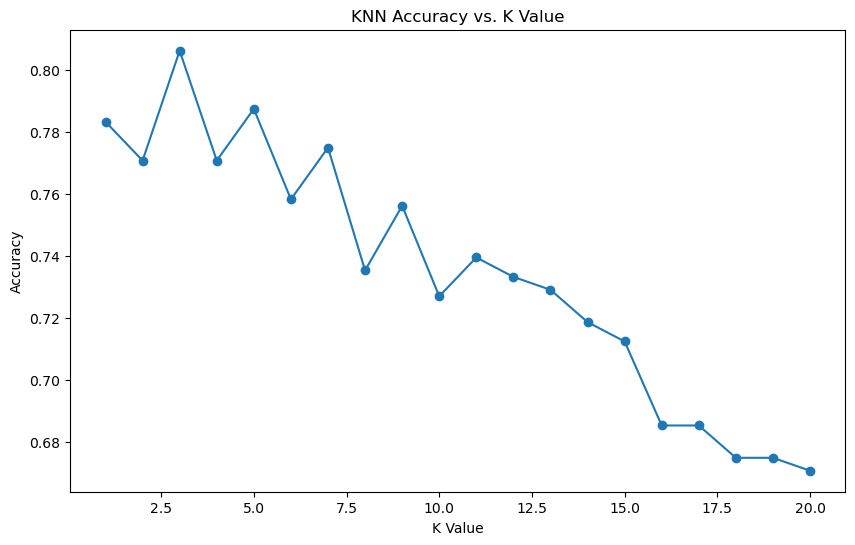

In [35]:
# KNN performansını k sayısına göre inceleme
knn_accuracies = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    knn_accuracies.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()


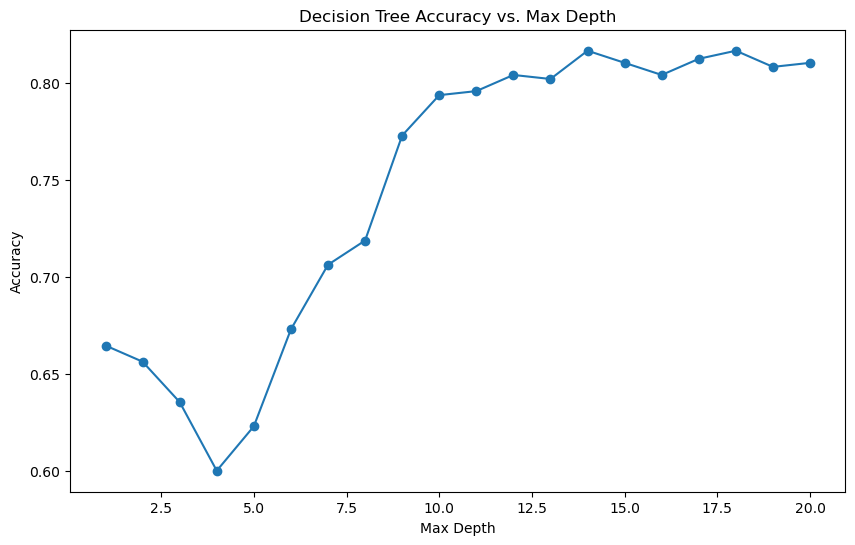

In [41]:
# Desicion Tree performansını max_depth'e göre inceleme
dt_accuracies = []
depth_values = range(1, 21)
for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    dt_accuracies.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(depth_values, dt_accuracies, marker='o')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

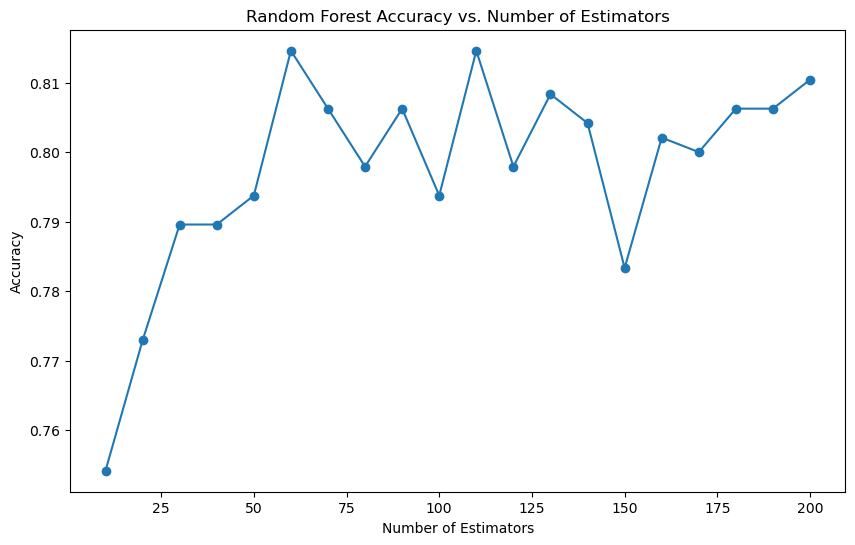

In [43]:
# Random Forest performansını estimators sayısına göre inceleme
rf_accuracies = []
estimator_values = range(10, 210, 10)
for n_estimators in estimator_values:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
    rf_accuracies.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(estimator_values, rf_accuracies, marker='o')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

In [45]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [47]:
# Diğer modellerin en iyi sonuçlarını hesaplama
best_knn_k = k_values[np.argmax(knn_accuracies)]
best_dt_depth = depth_values[np.argmax(dt_accuracies)]
best_rf_estimators = estimator_values[np.argmax(rf_accuracies)]

knn = KNeighborsClassifier(n_neighbors=best_knn_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

dt = DecisionTreeClassifier(max_depth=best_dt_depth)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

rf = RandomForestClassifier(n_estimators=best_rf_estimators)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [49]:
results = {
    'Model': ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_knn, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_svm]
}

results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy
0            KNN  0.760331
1    Naive Bayes  0.561983
2  Decision Tree  0.818182
3  Random Forest  0.785124
4            SVM  0.669421


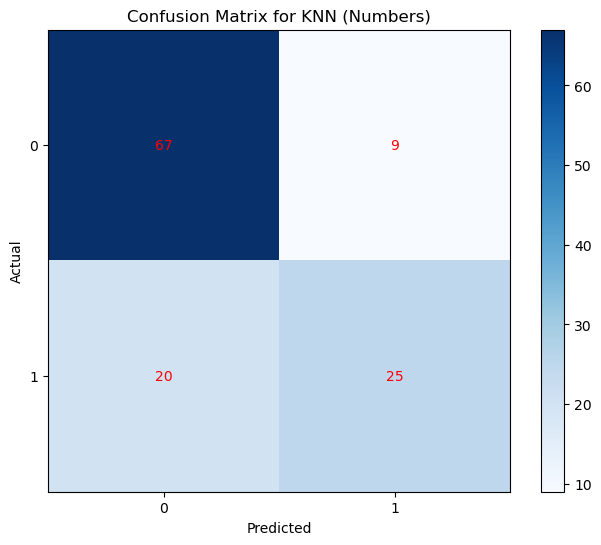

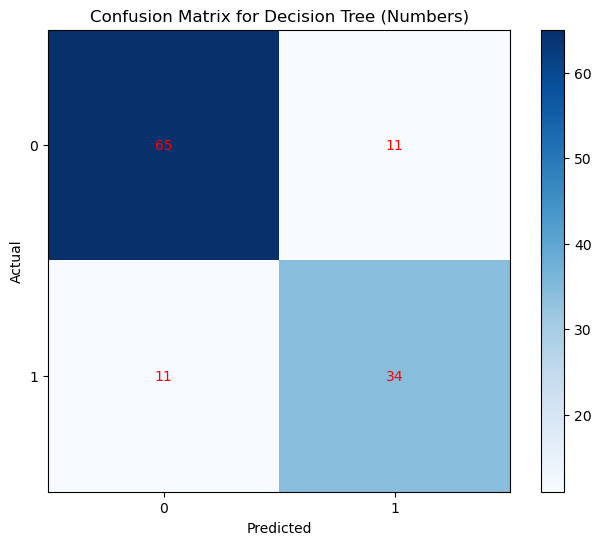

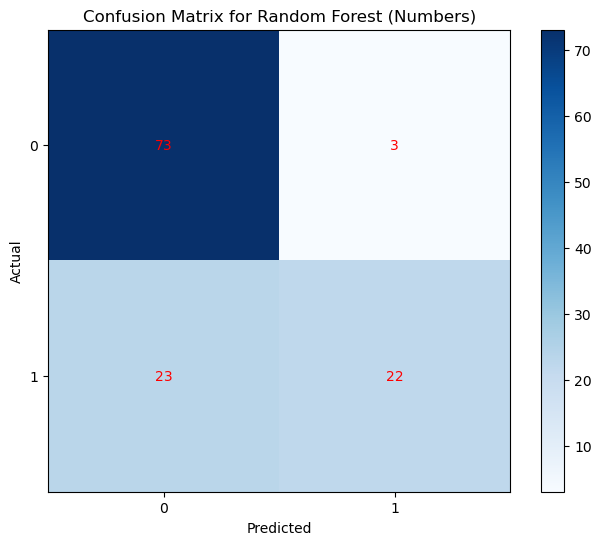

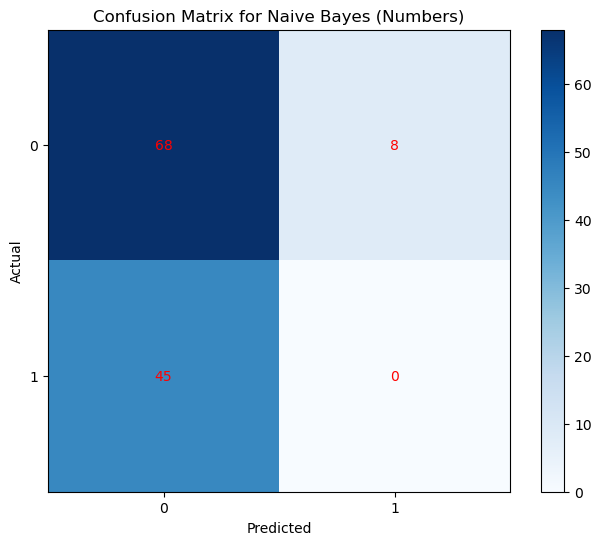

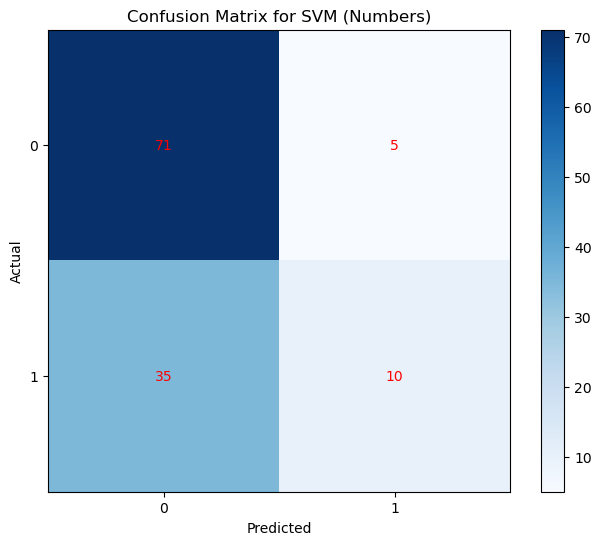

In [55]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            plt.text(j, i, cm[i][j], ha='center', va='center', color='red', fontsize=10)
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(f"{title} (Numbers)")
    plt.colorbar()
    tick_marks = np.arange(len(cm))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(cm_knn, 'Confusion Matrix for KNN')
plot_confusion_matrix(cm_dt, 'Confusion Matrix for Decision Tree')
plot_confusion_matrix(cm_rf, 'Confusion Matrix for Random Forest')
plot_confusion_matrix(cm_nb, 'Confusion Matrix for Naive Bayes')
plot_confusion_matrix(cm_svm, 'Confusion Matrix for SVM')

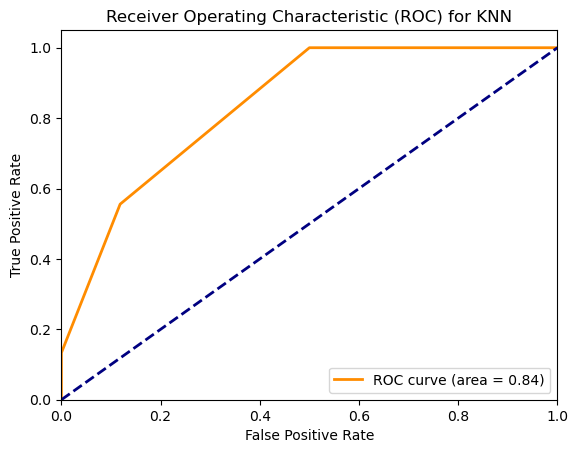

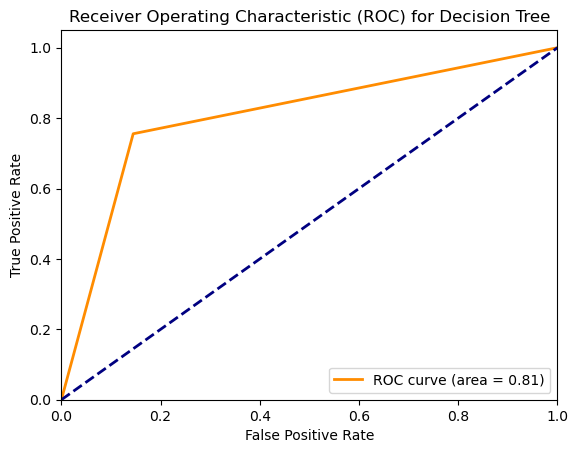

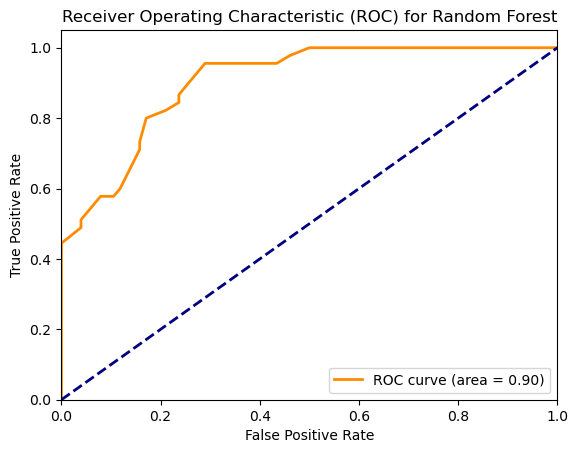

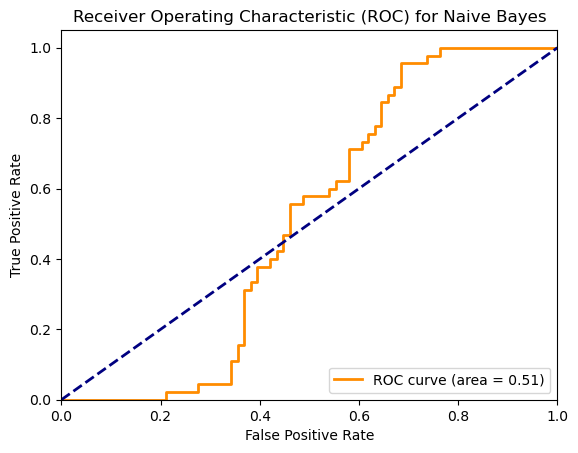

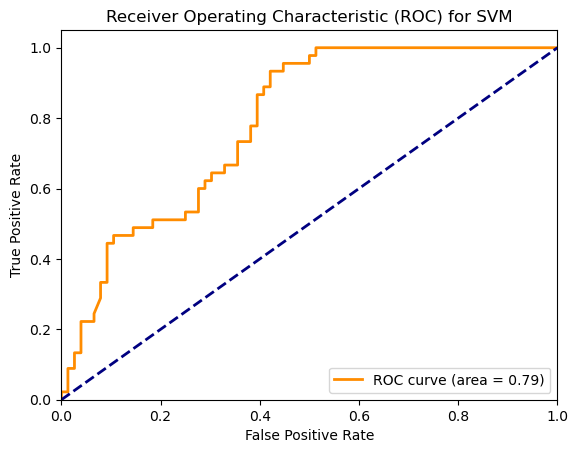

In [63]:
models = {'KNN': knn, 'Decision Tree': dt, 'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm}
for name, model in models.items():
    if name != 'Naive Bayes': 
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) for {name}')
    plt.legend(loc="lower right")
    plt.show()

In [65]:
best_method = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"En iyi yöntem: {best_method['Model']} ile {best_method['Accuracy']:.2f} doğruluk")

En iyi yöntem: Decision Tree ile 0.82 doğruluk


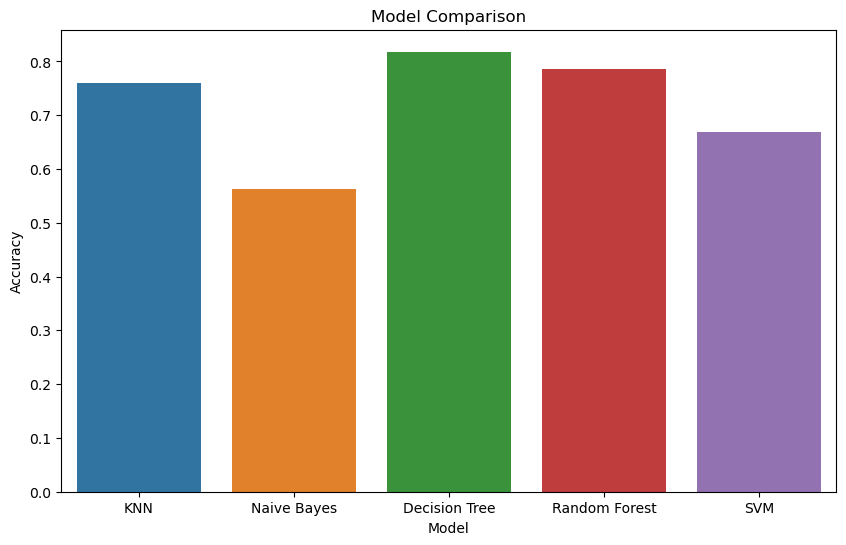

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()